## Data Exploration

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [47]:
df = pd.read_csv("cookie_cats.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [49]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

## Define Player Categories

In [50]:
threshold_new = df['sum_gamerounds'].quantile(0.25)
threshold_new

5.0

In [51]:
df['player_experience'] = df['sum_gamerounds'].apply(lambda x: 'New' if x <= threshold_new else 'Experienced')

In [52]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7,player_experience
0,116,gate_30,3,False,False,New
1,337,gate_30,38,True,False,Experienced
2,377,gate_40,165,True,False,Experienced
3,483,gate_40,1,False,False,New
4,488,gate_40,179,True,True,Experienced


## Split the Data

In [53]:
new_players = df[df['player_experience']=='New']
experienced_players = df[df['player_experience']=='Experienced']

## Perform A/B Testing

### New Players

In [54]:
# Split new players into control and test groups
new_control = new_players[new_players['version']=='gate_30']
new_test = new_players[new_players['version']=='gate_40']

# Calculate counts for retention
new_count_1 = [new_control['retention_1'].sum(), new_test['retention_1'].sum()]
new_count_7 = [new_control['retention_7'].sum(), new_test['retention_7'].sum()]

# Calculate the total number of observations
new_nobs = [len(new_control), len(new_test)]

# Perform Z-Test for Proportions
new_stat_1, new_pval_1 = proportions_ztest(new_count_1, new_nobs)   
new_stat_7, new_pval_7 = proportions_ztest(new_count_7, new_nobs)

# Interpret the P-Values
alpha = 0.05
if new_pval_1 < alpha:
    print(f"New Players (Day 1) Z-Test: p-value = {new_pval_1} (Significant difference between gate_30 and gate_40)")
else:
    print(f"New Players (Day 1) Z-Test: p-value = {new_pval_1} (No significant difference between gate_30 and gate_40)")
    
if new_pval_7 < alpha:
    print(f"New Players (Day 7) Z-Test: p-value = {new_pval_7} (Significant difference between gate_30 and gate_40)")
else:
    print(f"New Players (Day 7) Z-Test: p-value = {new_pval_7} (No significant difference between gate_30 and gate_40)")

New Players (Day 1) Z-Test: p-value = 0.03680478088374052 (Significant difference between gate_30 and gate_40)
New Players (Day 7) Z-Test: p-value = 0.518804091696032 (No significant difference between gate_30 and gate_40)


### Experienced Players

In [55]:
# Split experienced players into control and test groups
exp_control = experienced_players[experienced_players['version']=='gate_30']
exp_test = experienced_players[experienced_players['version']=='gate_40']

# Calculate counts for retention
exp_count_1 = [exp_control['retention_1'].sum(), exp_test['retention_1'].sum()]
exp_count_7 = [exp_control['retention_7'].sum(), exp_test['retention_7'].sum()]

# Calculate the total number of observations
exp_nobs = [len(exp_control), len(exp_test)]

# Perform Z-Test for Proportions
exp_stat_1, exp_pval_1 = proportions_ztest(exp_count_1, exp_nobs)   
exp_stat_7, exp_pval_7 = proportions_ztest(exp_count_7, exp_nobs)

# Interpret the P-Values
alpha = 0.05
if exp_pval_1 < alpha:
    print(f"Experienced Players (Day 1) Z-Test: p-value = {exp_pval_1} (Significant difference between gate_30 and gate_40)")
else:
    print(f"Experienced Players (Day 1) Z-Test: p-value = {exp_pval_1} (No significant difference between gate_30 and gate_40)")
    
if exp_pval_7 < alpha:
    print(f"Experienced Players (Day 7) Z-Test: p-value = {exp_pval_7} (Significant difference between gate_30 and gate_40)")
else:
    print(f"Experienced Players (Day 7) Z-Test: p-value = {exp_pval_7} (No significant difference between gate_30 and gate_40)")

Experienced Players (Day 1) Z-Test: p-value = 0.2428595397580815 (No significant difference between gate_30 and gate_40)
Experienced Players (Day 7) Z-Test: p-value = 0.009414437422179548 (Significant difference between gate_30 and gate_40)


## Calculate Effect Sizes

In [56]:
# Retention rates for new players
new_group_summary = new_players.groupby('version')[['retention_1', 'retention_7']].mean()
print("New Players Retention Rates:")
print(new_group_summary)

New Players Retention Rates:
         retention_1  retention_7
version                          
gate_30     0.064781     0.012193
gate_40     0.071479     0.013111


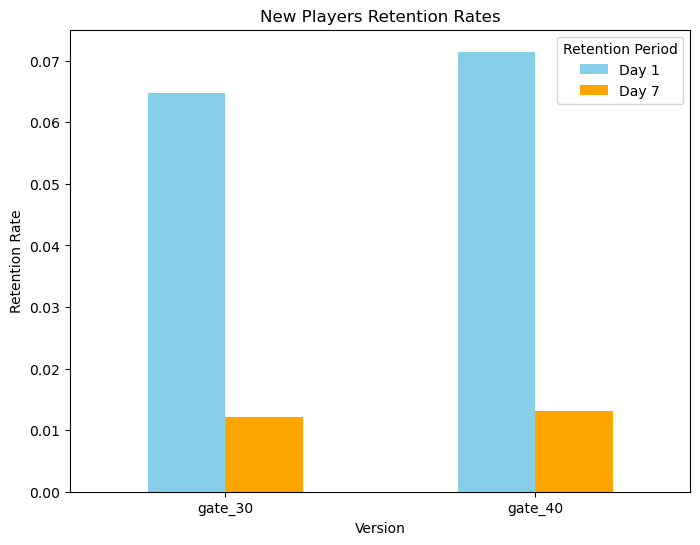

In [57]:
# Convert boolean values to 1 (True) and 0 (False) for retention calculations
df['retention_1'] = df['retention_1'].astype(int)

# Calculate the summary
new_group_summary = new_players.groupby('version')[['retention_1', 'retention_7']].mean()

# Plot the data
new_group_summary.plot(kind='bar', figsize=(8,6), title='New Players Retention Rates', color=['skyblue', 'orange'])   

# Customize the plot
plt.ylabel("Retention Rate")
plt.xlabel("Version")
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.legend(title="Retention Period", labels=["Day 1", "Day 7"])

plt.savefig("New_Retention_Rates.png", transparent=True)
plt.show()

In [58]:
# Retention rates for experienced players
exp_group_summary = experienced_players.groupby('version')[['retention_1', 'retention_7']].mean()
print("\nExperienced Players Retention Rates:")
print(exp_group_summary)


Experienced Players Retention Rates:
         retention_1  retention_7
version                          
gate_30     0.589787     0.255943
gate_40     0.585293     0.247137


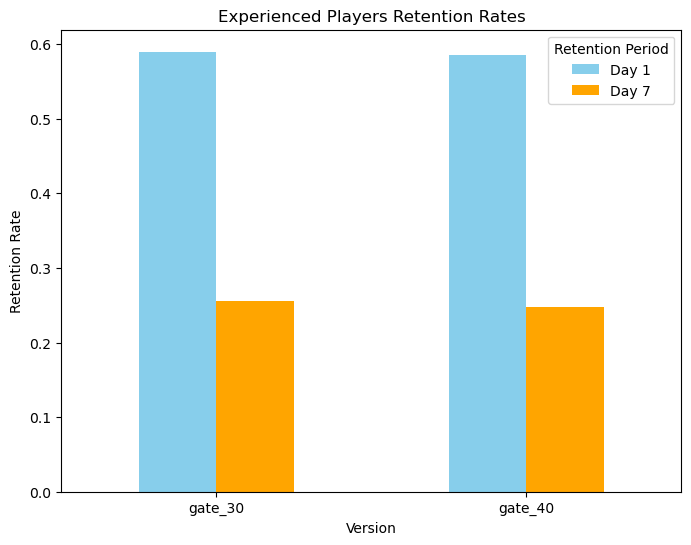

In [59]:
# Convert boolean values to 1 (True) and 0 (False) for retention calculations
df['retention_1'] = df['retention_1'].astype(int)
df['retention_7'] = df['retention_7'].astype(int)

# Calculate the summary
exp_group_summary = experienced_players.groupby('version')[['retention_1', 'retention_7']].mean()

# Plot the data
exp_group_summary.plot(kind='bar', figsize=(8,6), title='Experienced Players Retention Rates', color=['skyblue', 'orange']) 

# Customize the plot
plt.ylabel("Retention Rate")
plt.xlabel("Version")
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.legend(title="Retention Period", labels=["Day 1", "Day 7"])

plt.savefig("Experienced_Retention_Rates.png", transparent=True)
plt.show()

In [60]:
# New players' uplift
uplift_1_new = (new_test['retention_1'].mean() - new_control['retention_1'].mean()) / new_control['retention_1'].mean()
uplift_7_new = (new_test['retention_7'].mean() - new_control['retention_7'].mean()) / new_control['retention_7'].mean()

# Experienced players' uplift
uplift_1_exp = (exp_test['retention_1'].mean() - exp_control['retention_1'].mean()) / exp_control['retention_1'].mean()
uplift_7_exp = (exp_test['retention_7'].mean() - exp_control['retention_7'].mean()) / exp_control['retention_7'].mean()

# Print uplift percentages
print(f"New Players Uplift (Day 1): {uplift_1_new * 100:.2f}%")
print(f"New Players Uplift (Day 7): {uplift_7_new * 100:.2f}%")
print(f"Experienced Players Uplift (Day 1): {uplift_1_exp * 100:.2f}%")
print(f"Experienced Players Uplift (Day 7): {uplift_7_exp * 100:.2f}%")

New Players Uplift (Day 1): 10.34%
New Players Uplift (Day 7): 7.53%
Experienced Players Uplift (Day 1): -0.76%
Experienced Players Uplift (Day 7): -3.44%


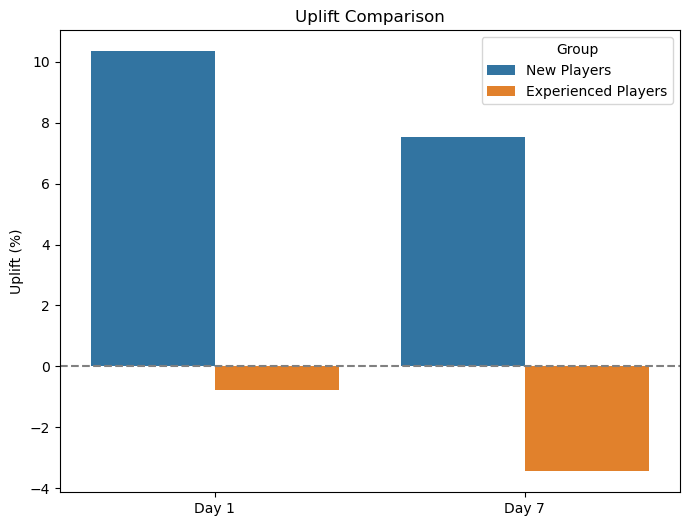

In [61]:
uplift_data = {
    'Group': ['New Players', 'New Players', 'Experienced Players', 'Experienced Players'],
    'Day': ['Day 1', 'Day 7', 'Day 1', 'Day 7'],
    'Uplift (%)': [10.34, 7.53, -0.76, -3.44]
}

df_uplift = pd.DataFrame(uplift_data)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df_uplift, x='Day', y='Uplift (%)', hue='Group')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Uplift Comparison")
plt.ylabel("Uplift (%)")
plt.xlabel("")
plt.savefig("uplift.png", transparent=True)
plt.show()